<h1 align='center'>Assigment 2</h1>

* Dimitris Stathopoulos f3352318
* dim.stathopoulos@aueb.gr


* **Create the 3D positions of the lamps as a list of tuples and calculate the matrix A**

In [35]:
import numpy as np

# Define the positions and heights of the lamps
lamp_positions_heights = [
    [(4.1, 20.4, 4), (14.1, 21.3, 3.5), (22.6, 17.1, 6), (5.5, 12.3, 4), (12.2, 9.7, 4)],
    [(15.3, 13.8, 6), (21.3, 10.5, 5.5), (3.9, 3.3, 5), (13.1, 4.3, 5), (20.3, 4.2, 4.5)]
]
display(lamp_positions_heights)

# Number of lamps, # 25x25 grid,  25 pixels in each dimension
num_lamps, num_pixels, grid_size = 10, 625, 25

lamp_info =[]

for k in range(num_lamps):
            lamp_pos_x, lamp_pos_y, lamp_height = lamp_positions_heights[k // 5][k % 5]
             # Store lamp info as tuple: (lamp number, x, y, distance)
            lamp_info.append((k, lamp_pos_x, lamp_pos_y, lamp_height))

# # Pixels
# num_pixels = 625 # 25x25 grid
# grid_size = 25 # 25 pixels in each dimension

# Initialize the A m*n matrix
A= np.zeros((num_pixels, num_lamps))


for i in range(grid_size):
    for j in range(grid_size):
        pixel_center = (i + 0.5, j + 0.5, 0)
        # print(f"Pixel center is :{pixel_center}")
        for k in range(num_lamps):
            lamp_pos_x, lamp_pos_y, lamp_height = lamp_positions_heights[k // 5][k % 5]

            # Calculate Euclidean distance between lamp and pixel center
            # (x- pixel_center)**2 + (y - pixel_center)**2 + (height - pixel_center)**2
            distance_sq = (lamp_pos_x - pixel_center[0])**2 + (lamp_pos_y - pixel_center[1])**2 + (lamp_height - pixel_center[2])**2
            # we need the squared root of the distance
            distance = np.sqrt(distance_sq)


            # Calculate illumination using inverse square law
            A[i * grid_size + j, k] = 1 / distance_sq # distance_sq is squared so we use it directly
            # print(f"Row:{i * grid_size + j}, column:{k}")
            # print(f"This cell in A is :{A[i * grid_size + j, k]}")

# Print the first column of A
print("First column of A (illumination pattern for the first lamp):")
print(A[:, 0][:5])


# Print lamp info list
print("\nLamp info:")
for info in lamp_info:
    print(info)

[[(4.1, 20.4, 4),
  (14.1, 21.3, 3.5),
  (22.6, 17.1, 6),
  (5.5, 12.3, 4),
  (12.2, 9.7, 4)],
 [(15.3, 13.8, 6),
  (21.3, 10.5, 5.5),
  (3.9, 3.3, 5),
  (13.1, 4.3, 5),
  (20.3, 4.2, 4.5)]]

First column of A (illumination pattern for the first lamp):
[0.00235311 0.00258953 0.00286229 0.00317894 0.00354899]

Lamp info:
(0, 4.1, 20.4, 4)
(1, 14.1, 21.3, 3.5)
(2, 22.6, 17.1, 6)
(3, 5.5, 12.3, 4)
(4, 12.2, 9.7, 4)
(5, 15.3, 13.8, 6)
(6, 21.3, 10.5, 5.5)
(7, 3.9, 3.3, 5)
(8, 13.1, 4.3, 5)
(9, 20.3, 4.2, 4.5)


* Scale down A / Check the average illumination

In [36]:

# Normalize A so that the average illumination level is one when all lamps have power one
A /= np.mean(A @ np.ones(num_lamps))
print(A.shape)
# Create a 1x10 vector with all positions having the value of 1
lamp_powers = np.ones(num_lamps)

# Multiply matrix A by the lamp powers vector
illumination_levels = np.dot(A, lamp_powers)

# Calculate the average illumination level
average_illumination = np.mean(illumination_levels)

# Print the average illumination level
print("Average illumination level:", average_illumination)


(625, 10)
Average illumination level: 1.0


1. Using colormap, create two graphs to show the illumination of the two
patterns: The first with all lamps set to 1 and the other that minimize
the sum square deviation with a desired uniform illumination. Which are
the Root Mean Squared (RMS) errors in both cases?


* For the pattern with all lamps set to 1, we need to multiply the matrix A with the n-column vector p which will be p = [1,1,1..., 1]^T and then we can reshape the 625x1 resulting matrix to match 25x25 dimensions in order to plot it as a color map.

In [37]:
# Perform the multiplication
resulting_vector = A @ np.ones(num_lamps)
print(f"Shape of the resulting vector is: {resulting_vector.shape}")
print(resulting_vector[:5])




# Reshape the vector
new_matrix_1 = resulting_vector.reshape((25, 25))
print(f"\nShape of the new matrix is: {new_matrix_1.shape}")

Shape of the resulting vector is: (625,)
[0.51016854 0.55755316 0.59778993 0.62623771 0.64181839]

Shape of the new matrix is: (25, 25)


* **RMSE is the deviation of the resulting_vector from the desired lighting level for each pixel.**

In [38]:

def calculate_rmse(vector1, vector2):
    """
    Calculate the Root Mean Squared Error (RMSE) between two vectors.

    Parameters:
    vector1 (numpy array): First vector.
    vector2 (numpy array): Second vector.

    Returns:
    float: RMSE between the two vectors.
    """
    # Ensure both vectors have the same length
    if len(vector1) != len(vector2):
        raise ValueError("Vectors must have the same length.")

    # Calculate squared differences
    squared_diff = (vector1 - vector2) ** 2

    # Calculate mean squared difference
    mean_squared_diff = np.mean(squared_diff)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_diff)

    return rmse

rmse_1 = calculate_rmse(resulting_vector, np.ones(num_pixels))
print(f"RMSE with all lamps being 1 is: {rmse_1:.2f}")

RMSE with all lamps being 1 is: 0.24


* Now we need to apply the standard Least Square Approach to find the vector p.

In python we can right the equation as: np.norm(A@p - np.ones(num_pixels))**2


Check the rank of A to validate if A is able to have a transpose.

In [39]:
import numpy as np

# Calculate the rank of matrix A
rank_A = np.linalg.matrix_rank(A)

# Print the rank of matrix A
print("Rank of matrix A:", rank_A)


Rank of matrix A: 10


* Matrix's rank is 10 which equal to the number of its columns, so A is invertible!

In [40]:
# Define the desired illumination pattern (vector of ones)
l_desired = np.ones(num_pixels)

# Compute the least squares solution
A_transpose_A = A.T @ A
A_transpose_l = A.T @ l_desired
p_least_squares = np.linalg.solve(A_transpose_A, A_transpose_l)

print(f"The estimated vector is: {p_least_squares}")

The estimated vector is: [1.46211018 0.78797433 2.96641047 0.74358042 0.08317333 0.21263945
 0.21218408 2.05114815 0.90760315 1.47222464]


In [41]:
resulting_vector = A @ p_least_squares
# Reshape the vector
new_matrix_2 = resulting_vector.reshape((25, 25))
print(f"\nShape of the new matrix is: {new_matrix_2.shape}")


rmse_ls = calculate_rmse(resulting_vector, np.ones(num_pixels))
print(f"The Least Squares solution RMSE is: {rmse_ls:.2f}")


Shape of the new matrix is: (25, 25)
The Least Squares solution RMSE is: 0.14


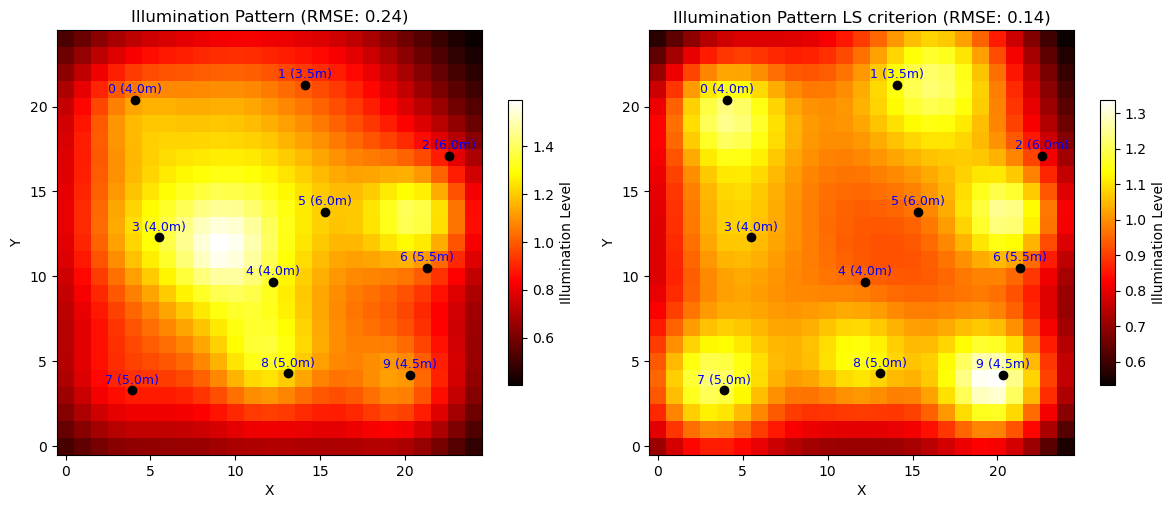

In [42]:
def color_maps(matrix1, matrix2, rmse_1, rmse_2):
    import matplotlib.pyplot as plt

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the reshaped vector as an image representing the illumination pattern in the first subplot
    im1 = axes[0].imshow(matrix1, cmap='hot', interpolation='nearest', origin='lower')
    axes[0].set_title(f'Illumination Pattern (RMSE: {rmse_1:.2f})')
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].set_aspect('equal')  # Set aspect ratio to equal

    # Add color bar for the first subplot
    cbar1 = fig.colorbar(im1, ax=axes[0], shrink=0.5)  # Set shrink to adjust the size of the color bar
    cbar1.set_label('Illumination Level')

    # Plot lamp positions as black dots in the first subplot
    x_positions, y_positions = [], []
    for lamp_num, dims in enumerate(lamp_info):
        x_positions.append(dims[1])
        y_positions.append(dims[2])
        annotation_text = f"{lamp_num} ({dims[3]:.1f}m)"
        axes[0].scatter(dims[1], dims[2], color='black', marker='o')
        axes[0].text(dims[1], dims[2] + 0.6, annotation_text, color='blue', fontsize=9, ha='center', va='center')

    # Plot the reshaped vector as an image representing the illumination pattern in the second subplot
    im2 = axes[1].imshow(matrix2, cmap='hot', interpolation='nearest', origin='lower')
    axes[1].set_title(f'Illumination Pattern LS criterion (RMSE: {rmse_2:.2f})')
    axes[1].set_xlabel('X')
    axes[1].set_ylabel('Y')
    axes[1].set_aspect('equal')  # Set aspect ratio to equal

    # Add color bar for the second subplot
    cbar2 = fig.colorbar(im2, ax=axes[1], shrink=0.5)  # Set shrink to adjust the size of the color bar
    cbar2.set_label('Illumination Level')

    # Plot lamp positions as black dots in the second subplot
    axes[1].scatter(x_positions, y_positions, color='black', marker='o')
    for lamp_num, dims in enumerate(lamp_info):
        annotation_text = f"{lamp_num} ({dims[3]:.1f}m)"
        axes[1].text(dims[1], dims[2] + 0.6, annotation_text, color='blue', fontsize=9, ha='center', va='center')

    # Adjust layout to prevent overlap
    plt.tight_layout()

    plt.show()

color_maps(new_matrix_1, new_matrix_2, rmse_1, rmse_ls)


2. Create the histogram of patch illumination values for all lamp powers one,
and for lamp powers found by LS. Explain the results.

In [43]:
# Flatten matrix
def calculate_illumination(new_matrix):
    illumination_levels = new_matrix.flatten()
    return illumination_levels

illumination_levels_1, illumination_levels_ls = calculate_illumination(new_matrix_1), calculate_illumination(new_matrix_2)




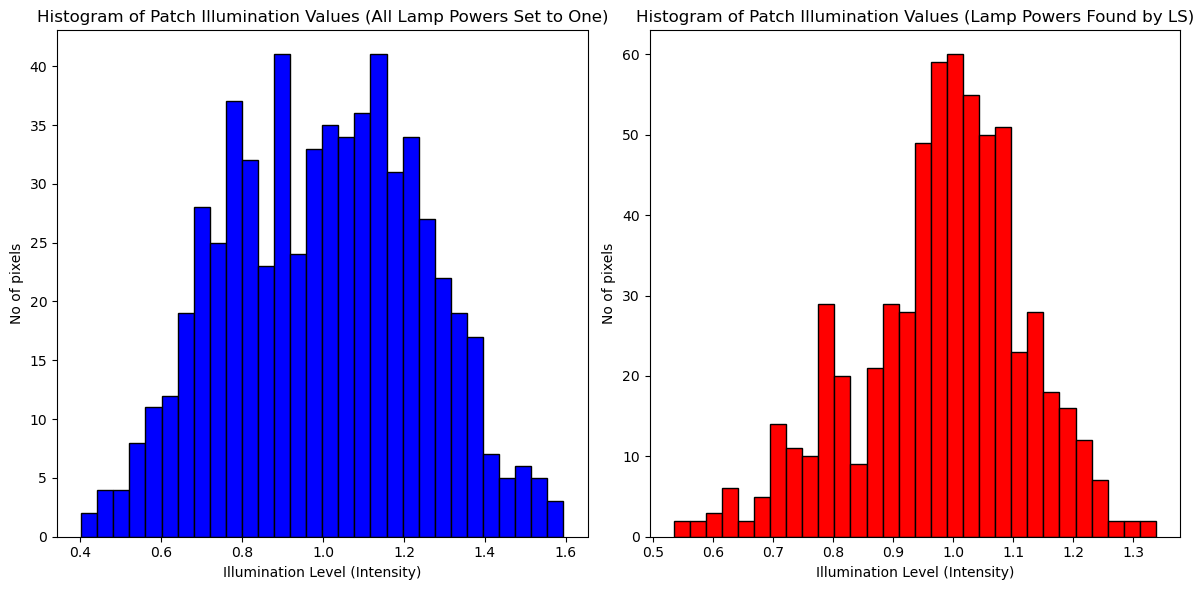

In [44]:
import matplotlib.pyplot as plt
# Create histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(illumination_levels_1, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Patch Illumination Values (All Lamp Powers Set to One)')
plt.xlabel('Illumination Level (Intensity)')
plt.ylabel('No of pixels')

plt.subplot(1, 2, 2)
plt.hist(illumination_levels_ls, bins=30, color='red', edgecolor='black')
plt.title('Histogram of Patch Illumination Values (Lamp Powers Found by LS)')
plt.xlabel('Illumination Level (Intensity)')
plt.ylabel('No of pixels')

plt.tight_layout()

plt.show()

The visual results of the histograms complement the RMSE errors we calculated earlier. In detail, the histogram on the left, representing the illumination levels with all lamp powers set to one, is centered around the mean value, which ideally should be 1, with some variance observed around this mean. However, as indicated by the RMSE error, the Least Squares (LS) approach provides a narrower distribution of illumination levels that are closer to the mean of 1.

Our objective is to achieve an ideal solution where all illumination values are 1. The LS approach, with its lower RMSE, moves us closer to this ideal compared to the first method. This suggests that the LS approach yields illumination patterns that are more consistent and closer to the desired uniform illumination level of 1 across all areas of the scene.

3. The above choice of points for the lamps was made in such a way to ensure
positivity in the corresponding power of the lamps. Now you have to add
an extra constraint. The total energy consumption of the lamps will be
equal 10 and non of them could be negative. Find the new power distribution of the lamps in order to ensure the least square (under constraints)
optimality

* Below we are using the method minimize from scipy.optimize which allows to minimize the objective fucntion norm(A@p - l_desired)**2. Also it should be noted that Sequential Least SQuares Programming(SLSQP) is one of the 3 in total methods that support constraint minimization with or without bound constraints and any other constraint.

**https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html**

In [45]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function
def objective(p_vector, A):
    return np.linalg.norm(A @ p_vector - np.ones(num_pixels))**2

# Define the sum constraint
def sum_constraint(p):
    return np.sum(p) - 10  # Sum of power should be 10

# Define the non-negativity constraint
bounds = [(0, None)] * 10  # Non-negativity constraint: each element of p should be non-negative

# Combine the constraints
constraints = [{'type': 'eq', 'fun': sum_constraint}]

# Initial guess
p0 = np.zeros(10)

# Optimize the objective function subject to constraints
result = minimize(objective, p0, args=(A,), constraints=constraints, bounds=bounds, method='SLSQP')

# Print the optimal solution
print("Optimal solution uder constraints:", result.x)

# Optimal solution found by the scipy minimize
p_minimize = result.x
print(f"\nCheck the sum to 10 constraint: {np.sum(p_minimize)}")


Optimal solution uder constraints: [1.33952077 0.89427087 2.36803552 0.77921564 0.31888448 0.
 0.39515226 1.76364936 0.76040629 1.38086481]

Check the sum to 10 constraint: 10.0


In [46]:
resulting_vector = A @ p_minimize
# Reshape the vector
new_matrix_min = resulting_vector.reshape((25, 25))
# print(f"\nShape of the new matrix is: {new_matrix_min.shape}")


rmse_ls_min = calculate_rmse(resulting_vector, np.ones(num_pixels))
print(f"Least Squares with constraints RMSE is: {rmse_ls_min:.2f}")

Least Squares with constraints RMSE is: 0.16


* **Visualize the distibution in a histogram**

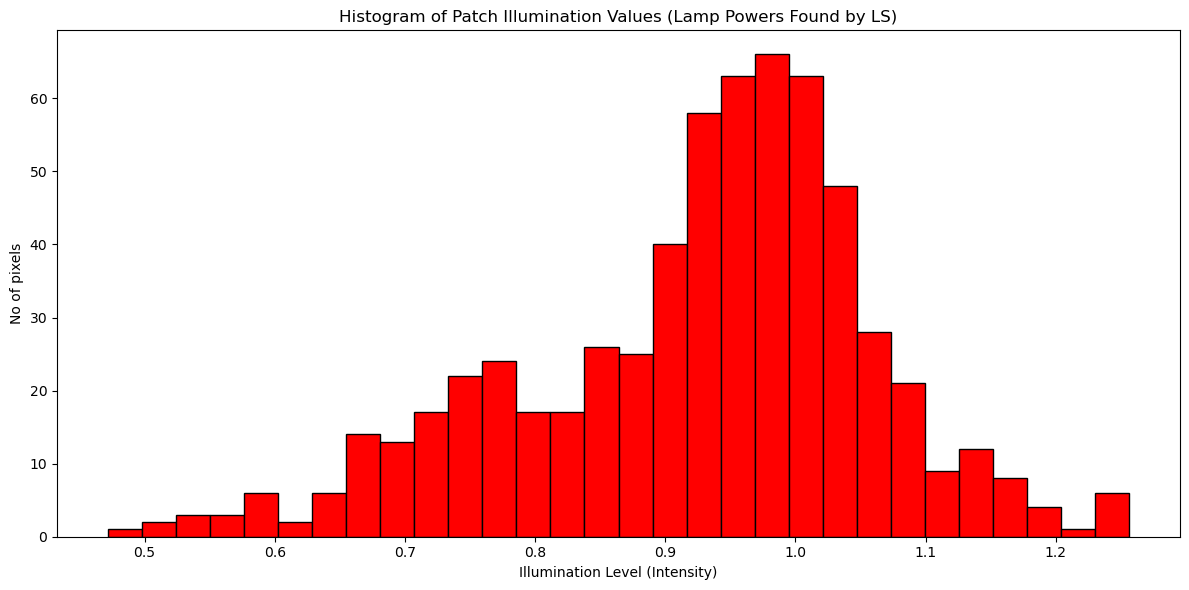

In [47]:
import matplotlib.pyplot as plt


# Calculate the illumination levels for this approach
illumination_levels_min = calculate_illumination(new_matrix_min)
# Create histograms
plt.figure(figsize=(12, 6))
plt.hist(illumination_levels_min, bins=30, color='red', edgecolor='black')
plt.title('Histogram of Patch Illumination Values (Lamp Powers Found by LS)')
plt.xlabel('Illumination Level (Intensity)')
plt.ylabel('No of pixels')

plt.tight_layout()

plt.show()

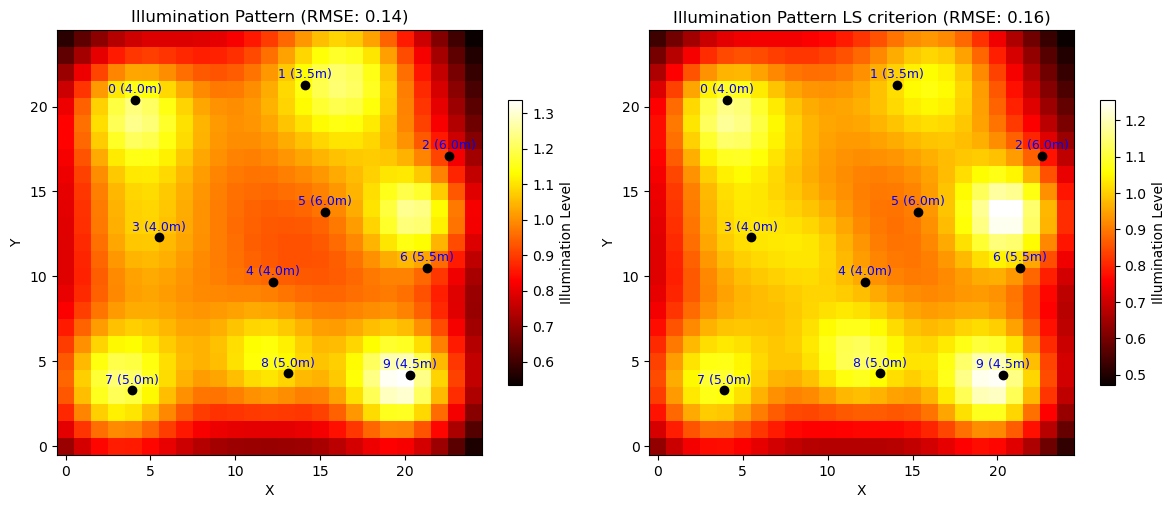

In [48]:
color_maps(new_matrix_2, new_matrix_min, rmse_ls, rmse_ls_min)

We were not able to beat the first method but we could not beat the standard LS approach(which is expected with LS being the optimal solution). This is derived from the RMSE which is 0.16 for the new method with both constraints and 0.14 for the standard LS aproach

4. Challenge. Try to find, new points for the lamps to beat the RMS error
of the first question. The lamps can be in any height between 4 and 6
meters and of course inside the area. Again, the total energy of the lamps
should be 10 and non of them should be negative. Run different -randomchoices of positions until you find a better solution. For this choice of
points, create present the colormap picture of the illumination as well as
the histogram of the intensities of the pixels of the area.


In [49]:
import numpy as np
from scipy.optimize import minimize
import random

def generate_lamp_positions_heights(num_rows, num_cols):
    """
    Generate random positions and heights for each lamp within specified ranges.

    Args:
    - num_rows (int): Number of rows of lamps.
    - num_cols (int): Number of columns of lamps.

    Returns:
    - lamp_positions_heights (list): List of lamp positions and heights.
    """
    lamp_positions_heights = []
    for _ in range(num_rows):
        row_positions_heights = []
        for _ in range(num_cols):
            x = round(random.uniform(0, 25), 1)
            y = round(random.uniform(0, 25), 1)
            height = round(random.uniform(4, 6), 1)
            row_positions_heights.append((x, y, height))
        lamp_positions_heights.append(row_positions_heights)
    return lamp_positions_heights

def calculate_matrix_A(lamp_positions_heights, num_pixels=625, grid_size=25):
    """
    Calculate the matrix A based on lamp positions and heights.

    Args:
    - lamp_positions_heights (list): List of lamp positions and heights.
    - num_pixels (int): Number of pixels in the grid.
    - grid_size (int): Size of the grid.

    Returns:
    - A (numpy.ndarray): Matrix A.
    """
    num_lamps = 10
    A = np.zeros((num_pixels, num_lamps))

    for i in range(grid_size):
        for j in range(grid_size):
            pixel_center = (i + 0.5, j + 0.5, 0)
            # print(f"Pixel center is :{pixel_center}")
            for k in range(num_lamps):
                lamp_pos_x, lamp_pos_y, lamp_height = lamp_positions_heights[k // 5][k % 5]
                distance_sq = (lamp_pos_x - pixel_center[0])**2 + (lamp_pos_y - pixel_center[1])**2 + (lamp_height - pixel_center[2])**2
                distance = np.sqrt(distance_sq)

                # Calculate illumination using inverse square law
                A[i * grid_size + j, k] = 1 / distance_sq # distance_sq is squared so we use it directly

    A /= np.mean(A @ np.ones(num_lamps)) # Ensure the the avearage will be 1
    return A

def objective(p, A, num_px):
    """
    Objective function to minimize.

    Args:
    - p (numpy.ndarray): Vector of lamp powers.
    - A (numpy.ndarray): Matrix A.
    - num_lamps (int): Number of lamps.

    Returns:
    - float: Value of the objective function.
    """
    result_vector = A @ p
    return np.linalg.norm(result_vector - np.ones(num_px))**2


def sum_constraint(p):
    """
    Sum constraint for the lamp powers.

    Args:
    - p (numpy.ndarray): Vector of lamp powers.

    Returns:
    - float: Value of the constraint.
    """
    return np.sum(p) - 10  # Sum of power should be 10

# Define the number of rows and columns
num_rows = 2
num_cols = 5

# Initialize variables
iterations, rms_errors = [], []

while True:
    # Generate lamp positions and heights
    lamp_positions_heights = generate_lamp_positions_heights(num_rows, num_cols)
    
    # Calculate matrix A
    A = calculate_matrix_A(lamp_positions_heights)

    # Optimize the objective function subject to constraints
    result = minimize(objective, np.ones(10), args=(A, A.shape[0]), bounds=[(0, None)]*10, constraints={'type': 'eq', 'fun': sum_constraint}, method='SLSQP')

    p_minimize = result.x
    resulting_vector = A @ p_minimize
    rmse_ls_min = np.linalg.norm(resulting_vector - np.ones(A.shape[0])) / np.sqrt(A.shape[0])

    # Store RMS error and iteration
    rms_errors.append(rmse_ls_min)
    iterations.append(len(rms_errors))

    if rmse_ls_min < rmse_ls:
        print(f"\n Estimated vector p is:\n {p_minimize} \n\nCheck the sum to 10 constaint: {np.sum(p_minimize):.1f}")
        break

    



 Estimated vector p is:
 [1.40373589 0.79908464 0.63233746 0.         2.09386155 0.81649425
 1.23787358 1.41035423 0.81996978 0.78628862] 

Check the sum to 10 constaint: 10.0


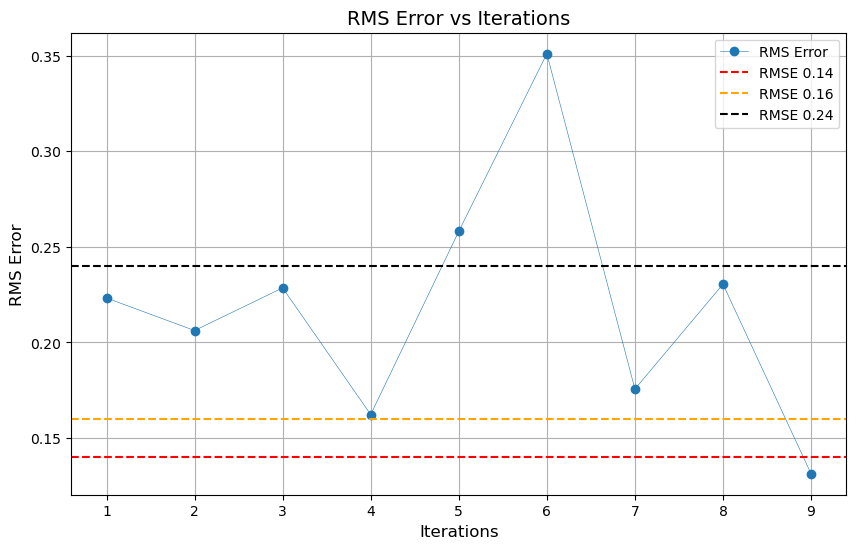

In [50]:

# Plot RMS errors against iterations
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.plot(iterations, rms_errors, marker='o', label='RMS Error', linewidth=0.4, markersize=6)  # Adjust marker size and line width
plt.axhline(y=0.14, color='red', linestyle='--', label='RMSE 0.14', linewidth=1.5)  # Adjust line width
plt.axhline(y=0.16, color='orange', linestyle='--', label='RMSE 0.16', linewidth=1.5)  # Adjust line width
plt.axhline(y=0.24, color='black', linestyle='--', label='RMSE 0.24', linewidth=1.5)  # Adjust line width
plt.xlabel('Iterations', fontsize=12)  # Adjust font size
plt.ylabel('RMS Error', fontsize=12)  # Adjust font size
plt.title('RMS Error vs Iterations', fontsize=14)  # Adjust font size
plt.grid(True)
plt.legend(fontsize=10)  # Adjust font size
plt.show()

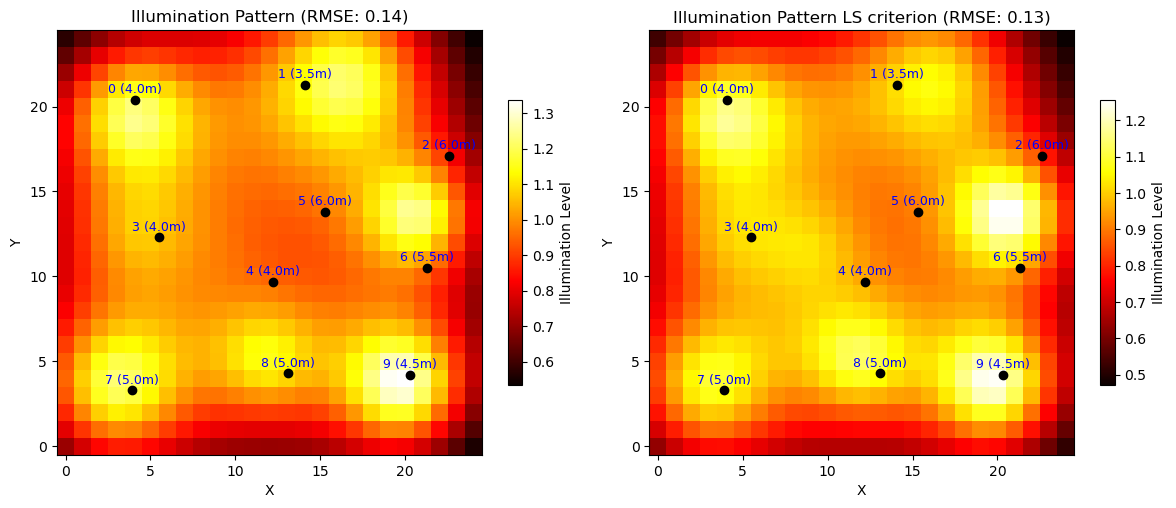

In [51]:
color_maps(new_matrix_2, new_matrix_min, rmse_ls, rmse_ls_min)